# Exercise 2 - State vectors and single qubit gates

In this exercise we consider the model of Quantum Computing for single qubit systems.
We examine math and Qiskit code for representing state and operations on one qubit.

In [1]:
# imports and utilities
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import AerSimulator
import math

## Exercise 2.1 - State vectors

Are these state vectors? In yes case, use the example to explain the terms amplitude and probability.

- $\begin{bmatrix}0.8\\0.2\end{bmatrix}$,
- $\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle$,
- $\begin{bmatrix}0\\i\end{bmatrix}$,
- $\dfrac{e^{i\pi}}{2}\begin{bmatrix}\sqrt{3}\\1\end{bmatrix}$.

## Exercise 2.2 - Hadamard gate

Consider the Hadamard gate $H=\dfrac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$.
1. Discuss whether the Hadamard gate is unitary.
2. Let the state vector $\frac{\sqrt{3}}{2}\lvert 0\rangle+\frac{1}{2}\lvert 1\rangle$ be the input of an Hadamard gate. What is the output state vector?
3. Let the state vector $-\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle$ be
the output of an Hadamard gate. What has been the input, is it uniquely determined?

## Exercise 2.3 - Quantum matrix operation

Consider the Rotation operator gate $R_y(\theta)=\begin{bmatrix}\cos(\theta/2)&-\sin(\theta/2)\\\sin(\theta/2)&\cos(\theta/2)\end{bmatrix}$.

1. Describe its effect on state vectors. Is there a geometrical interpretation?
2. How can $R_y(\theta)$ be used algorithmically to solve questions 2 and 3 of Exercise 2.2? ___Hint___: You need to find out a feasible value $\theta$ and utilize the following quantum circuit:

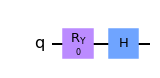

In [2]:
theta = 0 # set theta to a better value

qc = QuantumCircuit(1)
qc.ry(theta, 0)
qc.h(0)
Statevector(qc) # use the Statevector class to obtain the result

qc.draw(output="mpl")

## Exercise 2.4 - A quantum dice simulator

__Alice__ wants to roll a dice. At the moment, she does not have a dice available. Being smart, she opens her wallet and takes out three coins (one cent, two cent, five cent). She uses coin tosses to simulate a dice roll, using the following procedure:

1. Flip all three coins and interpret the results as bit word of length 3 (positions given by coin value) to obtain an integer number $x,\,0\le x\le 7$.
2. If $1\le x\le 6$, take $x$ as result of a dice roll.
3. Otherwise, repeat the flips.

Assuming the coins are fair, would the dice roll be fair as well? How likely is it, that we need to flip all coins at least 10 times get a dice roll?

__Bob__ wants to roll a dice. At the moment, he does not have a dice available - but a quantum computer. Mimic Alice's procedure by a classical algorithm executing a Qiskit circuit with 3 qubits.